# Graphical User Interface (GUI)

These are some tests of graphical user interfaces

In [6]:
import tkinter as tk

# Create main window
root = tk.Tk()
root.title("My First GUI")
root.geometry("300x150")

# Label
label = tk.Label(root, text="Enter your name:")
label.pack(pady=5)

# Entry
entry = tk.Entry(root)
entry.pack(pady=5)

# Function for button click
def say_hello():
    name = entry.get()
    if name.strip():
        result_label.config(text=f"Hello, {name}!")
    else:
        result_label.config(text="Please enter a name.")

# Button
button = tk.Button(root, text="Greet Me", command=say_hello)
button.pack(pady=5)

# Result label
result_label = tk.Label(root, text="")
result_label.pack(pady=5)

# Start the GUI loop
root.mainloop()

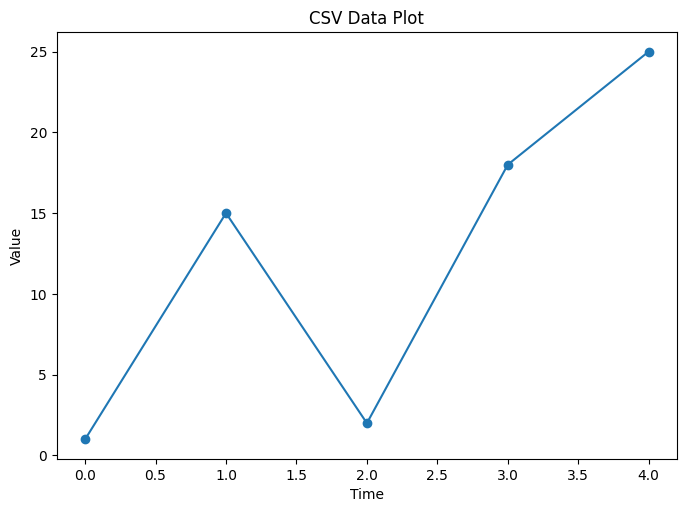

In [7]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Create main window
root = tk.Tk()
root.title("CSV Plotter")
root.geometry("800x600")

# Frame for plot
plot_frame = tk.Frame(root)
plot_frame.pack(fill=tk.BOTH, expand=True)

# Function to load and plot CSV
def load_and_plot():
    file_path = filedialog.askopenfilename(
        filetypes=[("CSV Files", "*.csv"), ("All Files", "*.*")]
    )
    if not file_path:
        return  # User canceled

    try:
        # Read CSV
        df = pd.read_csv(file_path)

        # Basic check
        if df.shape[1] < 2:
            messagebox.showerror("Error", "CSV must have at least 2 columns.")
            return

        # Create figure
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(df.iloc[:, 0], df.iloc[:, 1], marker="o")
        ax.set_xlabel(df.columns[0])
        ax.set_ylabel(df.columns[1])
        ax.set_title("CSV Data Plot")

        # Clear previous plot if any
        for widget in plot_frame.winfo_children():
            widget.destroy()

        # Embed plot in Tkinter
        canvas = FigureCanvasTkAgg(fig, master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    except Exception as e:
        messagebox.showerror("Error", f"Failed to load file:\n{e}")

# Button to load CSV
load_button = tk.Button(root, text="Load CSV and Plot", command=load_and_plot)
load_button.pack(pady=10)

root.mainloop()
